In [1]:
#### Carbonate Chemistry - very simple calculation.  Borates are left out.
#### Gretchen Keppel-Aleks -- October 2019
#### Inez Fung -- February 6 2014
#### 
####

# CO2 + H20 = H+ + HCO3-
# CO3= + H+ = HCO3-

# K1 = [H+][HCO3-]/[CO2]
# K2 = [H+][CO3=]/[HCO3-]
# K  = K1/K2
#    = [HCO2]*[HCO3])/[CO2]*[CO3=]

# DIC  = [CO2] + [HCO3] + [CO3=] approx= [HCO3-] + {CO3=]
# TALk = [HCO3-] + 2*{CO3=]

# [CO3=] = TALK - DIC
# [HCO3-] = DIC - [CO3=] = 2*DIC - TALK
# [CO2]= 1/K * (2*DIC - TALK)^2 /( TALK-DIC )


#%%%% Typical values for sea water  %%%%%%%%%%%%%%%%%%%%%%
#    TC = 25;                        % Temperature   (Celcius)
#    S =  35;                        % Salinity (psu, or g/kg)
#    P =  0;                         % Pressure      (bar)
#    ph1   = [8.2, 8.3, 8.4];        % pH
#    co21    = [10, 11, 12];         % [CO2]         (µmol/kg)
#    hco31 = [1700, 1750, 1800];     % [HCO3-]       (µmol/kg)
#    co31  = [200, 250, 300];        % [CO3--]       (µmol/kg)
#    alk1  = [2350, 2400, 2450];     % ALK           (µmol/kg)
#    dic1  = [1950, 2000, 2050];     % [DIC]         (µmol/kg)
#    pco21 = [355, 365, 375];        % pCO2          (µatm)

#%%%%%  co2, dic, etc in mol/kg or eq/kg
#    co2 = dic / (1.+K1/h+K1*K2/h/h);
#    hco3 = dic/(1+h/K1+K2/h);
#    co3 = dic/(1+h/K2+h*h/K1/K2);
#    alk = s*(K1/h+2.*K1*K2/h/h)+Kb*bor/(Kb+h)+Kw/h-h;

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Specify sanlinity and borates
S=35. # g/kg
bor = 1*(416*(S/35.))* 1.e-6;   # (mol/kg), DOE94

In [4]:
# Define solubility (T,S)
def lnsolub(T,S):
    A1=-60.2409
    A2=93.4517
    A3=23.3585
    B1=0.023417
    B2=-0.023656
    B3=0.0047036
    lnsolub=( A1 + A2*(100/T) + A3*np.log(T/100)+S*(B1 + B2*(T/100) + B3*(T/100)**2  ) )

    #lnsolub=(9345.17/T- 167.8108 + 23.3585*(np.log(T)) +[0.023517-2.3656e-4*T + 4.7036e-7*T*T]*S);
    return lnsolub 

In [5]:
#Define log of equilibrium constant 1
def pK1(T,S):
    pK1=(17.788 - 0.073104*T - 0.0051087*S + 1.1463e-4*T*T)
    return pK1

In [6]:
#Define log of equilibrium constant 2
def pK2(T,S):
    pK2=(20.919 - 0.064209*T - 0.011887*S + 8.7313e-5*T*T)
    return pK2

In [7]:
# Kw Used for alkalinity calculation
def lnKw(T,S):
    lnKw=(-13847.26/T + 148.96502 - 23.6521 * np.log(T) + (118.67/T - 5.977 + 1.0495*np.log(T))*np.sqrt(S) - 0.01615*S)
    return lnKw

In [8]:
#Kb used for alkalinity calculation
def lnKb(T,S):
    lnKb=( (-8966.90 - 2890.53*np.sqrt(S) - 77.942*S + 1.728*S**(3/2) - 0.0996*S*S)/T 
     + 148.0248 + 137.1942*np.sqrt(S) + 1.62142*S  
     + (-24.4344 - 25.085*np.sqrt(S) - 0.2474*S) *np.log(T) 
     + 0.053105*np.sqrt(S)*T  )
    return lnKb

In [9]:
#Explore how parameters vary with respect to temperature

temp=np.arange(0.,51.,1);   # temperature in Celsius

T=0*temp #initialize the arrays to have same length as temperature
solub=0*temp
solub2=0*temp
K1=0*temp
K2=0*temp
K=0*temp
solK=0*temp

for n in range(len(temp)): #loop over temperature
    print(n)
    T=273.15+temp[n];
    solub[n]=np.exp(lnsolub(T,S))
    solub2[n]=np.exp(lnsolub(T,40))
    K1[n]=10**(-pK1(T,S))
    K2[n]=10**(-pK2(T,S))
    print(K1[n], K2[n])
    K[n]=K1[n]/K2[n]
    solK[n]=solub[n]*K[n]



0
6.404895580832733e-07 3.3207017707957355e-10
1
6.559625641080179e-07 3.448676588803634e-10
2
6.714548201441697e-07 3.5801435287687847e-10
3
6.8695023561379e-07 3.7151279969230205e-10
4
7.024323392550146e-07 3.8536520405941967e-10
5
7.178843055043424e-07 3.995734185467168e-10
6
7.332889824258371e-07 4.1413892739530857e-10
7
7.486289211326039e-07 4.290628305105385e-10
8
7.638864066393973e-07 4.443458276533017e-10
9
7.79043490078143e-07 4.5998820287710506e-10
10
7.940820222019877e-07 4.759898092580231e-10
11
8.089836880969495e-07 4.923500539653389e-10
12
8.237300430140685e-07 5.090678837216244e-10
13
8.38302549229326e-07 5.261417707013189e-10
14
8.52682613832739e-07 5.435696989176388e-10
15
8.668516273428346e-07 5.613491511475949e-10
16
8.807910030378658e-07 5.794770964453876e-10
17
8.944822168904452e-07 5.979499782941199e-10
18
9.079068479881207e-07 6.167637034458825e-10
19
9.210466193188611e-07 6.359136314996452e-10
20
9.338834387968215e-07 6.553945652661295e-10
21
9.463994404013654e-

Text(0.5, 1.0, 'Temperature and Equilibrium Constants')

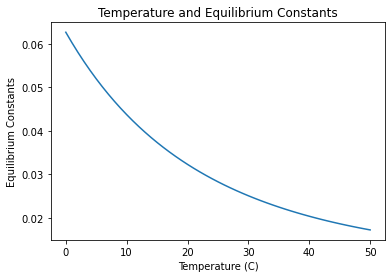

In [10]:
# Make some plots for Q1 here; make sure they're labeled and that you can see the data for each value clearly
#this might require multiple plots

# for this assignment, you may sometimes want to use linear, semi-log, or log-log plots
#Here is an example of the syntax for these plots
    
#plt.plot(temp, K2)        #this plots the x- and y-axes on a linear scale
#plt.semilogy(temp, K2)    #this plots the y-axis on a log scale
#plt.loglog(temp,K2)       #this plots both x- and y-axes on a log scale

plt.figure()
plt.plot(temp, solub)
#plt.semilogy(temp, K1, color='red',linewidth=2, label="K1")
#plt.semilogy(temp, K2, color='green',linewidth=2, label="K2")
#plt.semilogy(temp, K1)
#plt.loglog(temp, K2)
#plt.xlim([0,55])
#plt.ylim([0, 1.5])
plt.xlabel('Temperature (C)')
plt.ylabel('Equilibrium Constants')
plt.title('Temperature and Equilibrium Constants')
#plt.legend()



In [11]:
# Explore how partitioning between dissolved CO2,
# bicarbonate, and carbonate changes with T

S=35
temp=np.arange(0.,50.,1);   # temperature in Celsius
dic=2000e-6 #specify values for dic and total alkalinity (talk) Units are mol/kg
talk=2300e-6 # units are mol/kg

co2r=0*temp #initialize the arrays to have same length as temperature
hco3r=0*temp
co3r=0*temp
ph_t=0*temp
co2=0*temp
co3=0*temp
hco3=0*temp
K=0*temp

for n in range(len(temp)): #loop over temperature
    #print(n)
    T=273.15+temp[n];
    #print(T)
    K1=10**(-pK1(T,S))
    K2=10**(-pK2(T,S))
    K[n]=K1/K2
    co2=1/K[n]* (2*dic-talk)**2/(talk-dic)
    co3=talk-dic
    hco3=dic-co2-co3
    h=K2*hco3/co3 #concentration of H+ ions
    co2r[n]=co2/dic #fraction of CO2 to total DIC
    hco3r[n]=hco3/dic
    co3r[n]=co3/dic
    ph_t[n]=-np.log(h)/np.log(10)


[  0.12887063 -30.74857242]


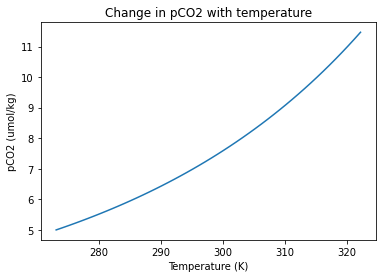

In [12]:
#Make a plot here to address questions 3 and 4 of the problem set:
#y = lnsolub(10**6*co2r*dic)
plt.figure()
plt.plot(temp+273.15, 10**6*co2r*dic) ##What have you plotted here? What are the units?
# temp in kelvins, absolute CO2 concentration mol/kg
plt.title('Change in pCO2 with temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('pCO2 (umol/kg)')
#plt.plot(temp+273.15, np.log(10**6*co2r*dic)) ## What have you plotted here? What are the units? 
# temp in kelvins, the log of absolute CO2 concentration mol/kg, slope

# Also calculate the slope C for questions 3 and 4 here:
C=np.polyfit(temp+273.15, 10**6*co2r*dic, 1) #What are the units on C? what is its physical meaning?
print(C)
# change in mol/kg per change in kelvin, or change in CO2 with temp
#C=np.polyfit(temp+273.15, np.log(10**6*co2r*dic), 1) #Here is an alternative formulation of C. What are its units? What is its physical meaning?
#print(C)
# log of change of CO2 with temp so like acceleration (change in slope)

In [13]:
#Explore how partitioning varies with pH of water

dic=2000e-6
T=273.15+15
ph=np.arange(3,14,0.02); #initialize values for dic, T and a vector for pH values between 3 and 14

co2r=0*ph; #initialize arrays to be same size as pH
hco3r=0*ph;
co3r=0*ph;

for n in range(len(ph)):
    h=10**(-ph[n])
    K1=10**(-pK1(T,S))
    K2=10**(-pK2(T,S))
    co2 = dic / (1.+K1/h+K1*K2/h/h)
    hco3 = dic/(1+h/K1+K2/h);
    co3 = dic/(1+h/K2+h*h/K1/K2)
    co2r[n]=co2/dic
    hco3r[n]=hco3/dic
    co3r[n]=co3/dic


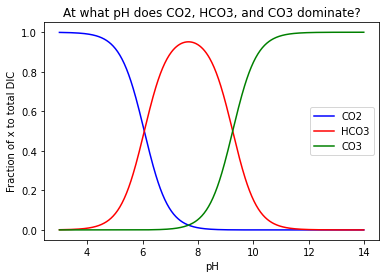

In [14]:
# Add some code to plot fraction of co2, hco3, and co3 vs pH
plt.figure()
plt.plot(ph, co2r, color='blue', label='CO2')
plt.plot(ph, hco3r, color='red', label='HCO3')
plt.plot(ph, co3r, color='green', label='CO3')
#plt.semilogy(ph, co2r)
#plt.loglog(ph, co2r)
#plt.xlim([7.9,8.2])
#plt.ylim([0,0.1])
plt.xlabel('pH')
plt.ylabel('Fraction of x to total DIC')
plt.title('At what pH does CO2, HCO3, and CO3 dominate?')
plt.legend()

In [15]:
#Explore how partitioning varies when alkalinity and DIC vary independently.
T=273.15+15;
K1=10**(-pK1(T,S))
K2=10**(-pK2(T,S))
Kb=np.exp(lnKb(T,S))
Kw=np.exp(lnKw(T,S))

# Fix ALK, vary DIC
alk0=2100e-6 #units are mol/kg
dic_in=np.arange(1800,2501,50) #units are umol/kg
#dic_in=np.array(2000)
temp

# Fix DIC, vary ALK
dic0=2000e-6  # Units are mol/kg
alk_in=np.arange(1800,2501,50) # units are umol/kg
#alk_in=np.array(2100e-6)


coeff=np.array([[0,1],[1,0]])       #initialize 2-D arrays 2 x size of DIC or ALK variable
CO2_r=np.zeros([2,len(dic_in)])     # case 0 is where DIC varies, case 1 is where ALK varies
HCO3_r=np.zeros([2,len(dic_in)])
CO3_r=np.zeros([2,len(dic_in)])
DIC_r=np.zeros([2,len(dic_in)])
ALK_r=np.zeros([2,len(dic_in)])
H_r=np.zeros([2,len(dic_in)])

for case in range(2):
    for n in range(len(dic_in)):
        dic=coeff[case,0]*dic0+coeff[case,1]*dic_in[n]*1e-6
        alk=coeff[case,0]*alk_in[n]*1e-6+coeff[case,1]*alk0  
        p5  = -1.
        p4  = -alk-Kb-K1
        p3  = dic*K1-alk*(Kb+K1)+Kb*bor+Kw-Kb*K1-K1*K2
        tmp = dic*(Kb*K1+2.*K1*K2)-alk*(Kb*K1+K1*K2)+Kb*bor*K1
        p2  = tmp+(Kw*Kb+Kw*K1-Kb*K1*K2)
        tmp = 2.*dic*Kb*K1*K2-alk*Kb*K1*K2+Kb*bor*K1*K2
        p1  = tmp+(+Kw*Kb*K1+Kw*K1*K2)
        p0  = Kw*Kb*K1*K2
        p   = np.array([p5, p4, p3, p2, p1, p0]) #Return the roots of a polynomial with coefficients given in p.
        r   = np.roots(p)
        h   = np.max(np.real(r))
        s = dic / (1.+K1/h+K1*K2/h/h)
        hco3 = dic/(1+h/K1+K2/h)
        co3 = dic/(1+h/K2+h*h/K1/K2)
        # ----------- change units to umol/kg
        CO2_r[case,n]   = 1.e6*s;
        HCO3_r[case,n]   = hco3*1.e6;
        CO3_r[case,n]    = co3*1.e6;
        DIC_r[case,n]    = dic*1.e6;
        ALK_r[case,n]    = alk*1.e6;
        H_r[case,n]      = h;



Text(0, 0.5, 'pCO2 (umol/kg)')

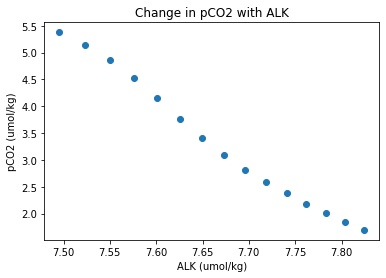

In [16]:
# Two different ways to plot for question 3:

plt.figure()
#plt.plot(temp+273.15, 10**6*co2r*dic)
#plt.plot(np.log(DIC_r [0,:]), np.log(CO2_r [0,:]), 'o')
plt.plot(np.log(ALK_r [1,:]), np.log(CO2_r [1,:]), 'o')
#plt.ylim([0,330])
#plt.xlim([0,2450])
plt.title('Change in pCO2 with ALK')
plt.xlabel('ALK (umol/kg)')
plt.ylabel('pCO2 (umol/kg)')

#Make some plots, fit slopes to them (similar to how it is shown for coefficient C above), plot your slope on the same axis!
#Which version of the plot do you find easier to interpret? What are the differences?



In [17]:
A=np.polyfit(np.log(DIC_r[0,:]), np.log(CO2_r[0,:]), 1)
B=np.polyfit(np.log(ALK_r[1,:]), np.log(CO2_r[1,:]), 1)
print(A)
print(B)


[ 12.56892345 -92.03904735]
[-11.87122389  94.35397236]


In [10]:
solub[24]

0.029022975702541164

In [11]:
solub[24]*300

8.706892710762348

In [12]:
solub[24]*330

9.577581981838584

In [13]:
9.577581981838584 - 8.706892710762348

0.8706892710762357